<a href="https://colab.research.google.com/github/vishnaka-dasanayaka/CVIP_Ass_2/blob/main/Take_home_assignment_2_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



In [ ]:
def otsu_thresholding(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255] - Q[i]
        if q1 == 0 or q2 == 0:
            continue
        b1, b2 = np.hsplit(bins, [i])
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh

In [ ]:
# Generate synthetic image with 2 objects and background
image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 100
image[60:80, 60:80] = 200

In [ ]:
# Add Gaussian noise
noise = np.random.normal(0, 20, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

In [ ]:
# Apply Otsu's algorithm
otsu_thresh = otsu_thresholding(noisy_image)
otsu_result = cv2.threshold(noisy_image, otsu_thresh, 255, cv2.THRESH_BINARY)[1]


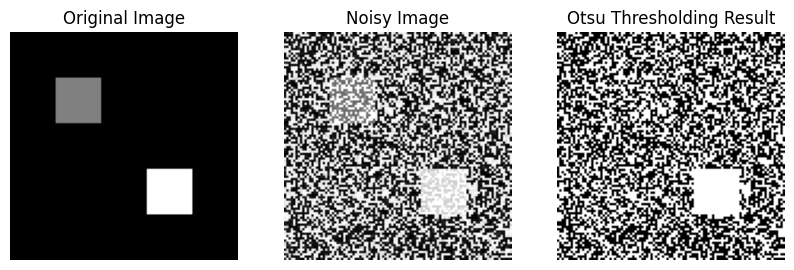

In [ ]:
# Display results using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(otsu_result, cmap='gray')
plt.title('Otsu Thresholding Result')
plt.axis('off')

plt.show()